# M4101, Arbres de décision et forêts aléatoires.
### Cedric Chauve, cedric.chauve@sfu.ca

Dans ce calepin, nous allons explorer le problème de classification supervisée avec la technique des arbres de décision et des forêts aléatoires.

In [1]:
# Importation des bibliotheques necessaires
import numpy as np
import pandas as pa
from matplotlib import pyplot as plt
import sklearn
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split
from IPython.display import Image

## Un premier exemple

On regarde un petit exemple de classification binaire, où on veut décider si un client potentiel va acheter un ordinateur (ou non)  basé sur 4 attributs, 
- son âge (3 valeurs, $\leq30$ and, $31-40$ ans, $>40$ ans), 
- son salaire (élevé, moyen, faible), 
- son occupation (étudiant ou non),
- son crédit (correct, excellent).

Le tableau ci-dessous présente nos données.

![Data](CART-ex2a.png "ShowMyImage")

In [2]:
# On commence par creer la matrice de donnees
# Attribut Age: <=30 valeur 1, 31..40, valeur 2, >40 valeur 3
# Attribut Salaire faible valeur 1, moyen valeur 2, eleve valeur 3
# Attribut Etudiant, oui valeur 1, non valeur 2
# Attribut Credit, correct valeur 1, excellent valeur 2
X1 = [[1,3,2,1],
     [1,3,2,2],
     [2,3,2,1],
     [3,2,2,1],
     [3,1,1,1],
     [3,1,1,2],
     [2,1,1,2],
     [1,2,2,1],
     [1,1,1,1],
     [3,2,1,1],
     [1,2,1,2],
     [2,2,2,2],
     [2,3,1,1],
     [3,2,2,2]]
# Classe: non = classe 0, oui = classe 1
y1 = [0,0,1,1,1,0,1,0,1,1,1,1,1,0]

In [3]:
# On apprend un arbre de decision a partir de ces donnees
# Par defaut, l'algorithme de sklearn utilise l'indice Gini
clf_gini     = tree.DecisionTreeClassifier()
clf_ex1_gini = clf_gini.fit(X1, y1)

Il est intéressant de lire la documentation de la classe DecisionTreeClassifier de sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

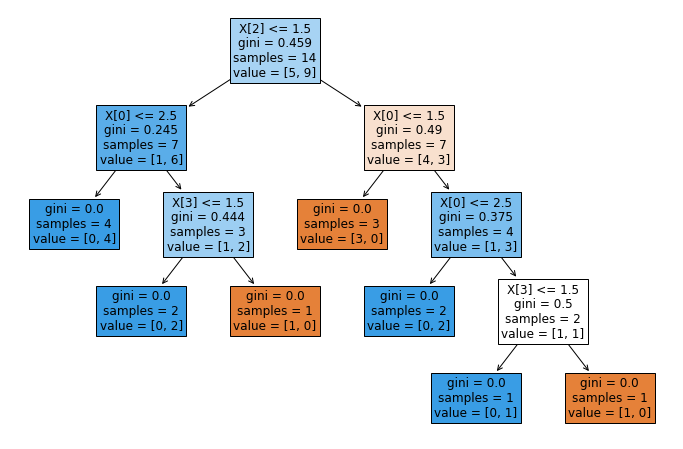

In [4]:
# On peut visualiser l'arbre de decision
plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf_ex1_gini, filled=True, fontsize=12) 

Les feuilles bleues correspondent à la classe 1 (ordinateur acheté) et les feuilles oranges à la classe 0 (pas d'achat d'ordinateur).

On peut observer que le premier test porte sur l'attribut "Etudiant". On peut aussi observer que l'attribut Age est le second attribut, et que sur le sous-arbre de gauche, il est utilisé en chaîne pour deux tests le long d'une meme branche.

Contrairement à ce qu'on a vu dans les transparents, on n'observe pas un branchement par valeur des attributs (certains attributs ont 3 valeurs) certaines branches ont été fusionnées en une seule branche, pour donner un arbre binaire.

Regardons maintenant l'arbre obtenu en utulisant l'entropie en place de l'indice Gini.

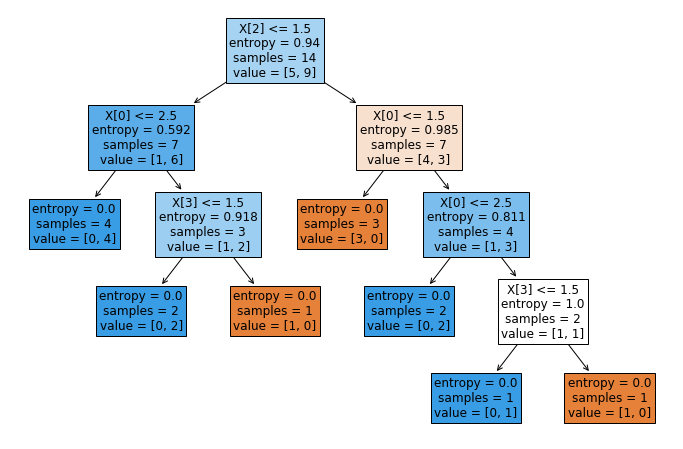

In [5]:
clf_entropie = tree.DecisionTreeClassifier(criterion='entropy')
clf_ex1_entropie = clf_entropie.fit(X1, y1)
plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf_ex1_entropie, filled=True, fontsize=12) 

Sur ce jeu de données simple, on obtient le même arbre.

## Un exemple (facile) sur un jeu de données réelles 

On va regarder le jeu de données "iris" de sklearn :  https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Dans cet exemple nous allons travailler avec la base de données Iris, facilement accessible dans sklearn. Cette base contient 150 instances d’iris (un type de plante, chaque observation décrit sa morphologie). L’objectif est de classer chaque instance en une des trois catégories : Iris setosa, Iris virginica ou Iris versicolor.

Les attributs du jeu de données sont :
- longueur de sépale,
- largeur de sépale,
- longueur de pétale,
- largeur de pétale.

On a 3 classes : Iris Setosa, Iris Versicolor ou Iris Virginica.

In [6]:
# On reprend en l'adaptant un peu le code utilise dans le TP sur la reduction de dimensionalite pour ecrire des fonctions generiques
# qui entrainent un classifieur et le testent.

# clf_class = methode de classification
def clf_train(X,y,clf_class):
    # Creation d'un classifieur KNN avec parameters par defaut
    clf = clf_class
    # Entrainement du classifieur avec les donnees d'entrainement
    classifieur = clf.fit(X,y)
    return(classifieur)

def clf_test(clf,X,y):
    # Application du classifieur entraine sur les donnees de test
    predictions = clf.predict(X)
    # Calcul du score F1. On doit changer l'option "average" qui par defaut ne marche
    # que pour de la classification binaire, voir 
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
    f1 = metrics.f1_score(y, predictions, average='micro')
    # Calcul de l'exactitude 
    exactitude  = metrics.accuracy_score(y, predictions)
    # On renvoie les deux statistiques exactitute et score F1
    return({'F1': round(f1,2), 'exactitude':round(exactitude,2)})

# Cette fonction entraine un classifieur de type "clf_class" sur des donnees d'entrainement X_train,y_train et
# le teste sur les donnees X_test,y_test. La fonction retourne le classifieur entraine et un dictionnaire
# contenant le score d'exactitude et le score F1
def clf(X_train,y_train,X_test,y_test,clf_class):
    # Entrainement du classifieur
    classifieur = clf_train(X_train,y_train,clf_class)
    # Test du classifieur
    resultats   = clf_test(classifieur,X_test,y_test)
    return(classifieur,resultats)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
Xiris, yiris = iris.data, iris.target

Jetons un coup d'oeuil aux caractéristiques de ce jeu de données.

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
# Transformons nos donnees en pandas data frame
Xiris_df = pa.DataFrame(Xiris, columns=iris.feature_names)
Xiris_df['target'] = yiris
Xiris_df['label']  = Xiris_df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
Xiris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


On voit que la classe 0 correspond aux iris de type setosa, la classe 1 aux iris versicolour et la classe 3 aux iris virginica.

In [10]:
# On separe les donnees en donnees d'apprentissage et donnees de test
# avec 70% des donnees utilisees pour l'apprentissage et 30% pour le test
Xiris_train, Xiris_test, yiris_train, yiris_test = train_test_split(Xiris, yiris, train_size=0.7, random_state=0)

In [11]:
print('Nombre d\'iris setosa dans X_train = '+ str(len([i for i in yiris_train if i==0])))
print('Nombre d\'iris versicolour dans X_train = '+ str(len([i for i in yiris_train if i==1])))
print('Nombre d\'iris virginica dans X_train = '+ str(len([i for i in yiris_train if i==2])))

Nombre d'iris setosa dans X_train = 34
Nombre d'iris versicolour dans X_train = 32
Nombre d'iris virginica dans X_train = 39


In [12]:
# On entraine un arbre de decision
clf_iris_dt,clf_iris_dt_test_results = clf(Xiris_train,yiris_train,Xiris_test,yiris_test,tree.DecisionTreeClassifier())

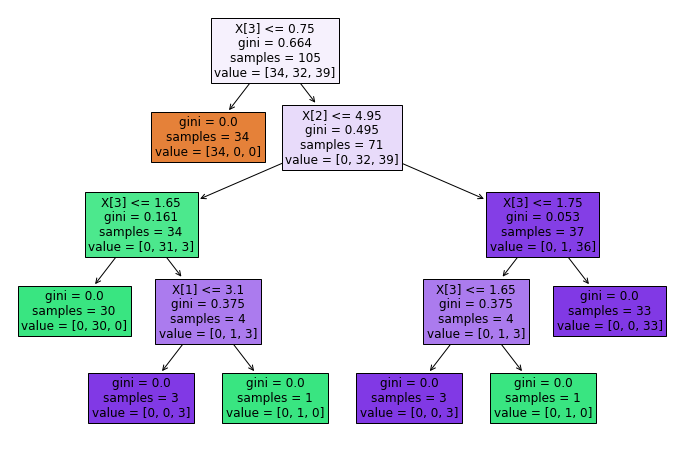

In [13]:
# On visualise le l'arbre de decision
plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf_iris_dt, filled=True, fontsize=12)

On peut observer que le premier test permet déjà de séparer les données:
- les 34 iris de type setosa forment une feuille, enfant de la racine (la feuille orange)
- le deuxième test permet de séparer presque complètement les deux autres classes (iris versicolour, feuilles vertes) d'un côté et iris virginica (feuilles bleues) de l'autre. On observe en effet 31 iris versicolour sur le sous-arbre gauche (contre 3 iris virginica) et 1 iris versicolour sur le sous-arbre droit (contre 36 iris virginica).

On peut en déduire qu'on peut sans doute bien classifier un iris avec seulement deux tests.

In [14]:
# regardons la qualite de la prediction avec cet arbre de classification
print('Exactitude de la classification avec un arbre de decision : '+str(clf_iris_dt_test_results['exactitude']))
print('Score F1 de la classification avec un arbre de decision : '+str(clf_iris_dt_test_results['F1']))

Exactitude de la classification avec un arbre de decision : 0.98
Score F1 de la classification avec un arbre de decision : 0.98


On obtient une exactitude de prédiction excellent, mais attendu avec un jeu de données aussi simple.

## Données difficiles 

On va maintenant regarder un jeu de données disponible dans sklearn, mais plus difficile. Il 'sagit du jeu de données **covtype**. Le chargement de données se fait via le web, et peut prendre un peu de temps.

In [15]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

On peut observer qu'il s'agit d'un jeu de données de classification en **7 classes** basé sur **54 attributs** (ce sont des données en haute dimension donc) et comportant plus de **500000** données. C'est beaucoup trop pour ce TP, aussi nous allons sélectionner les 10,000 premieres données.

In [16]:
Xcov, ycov = covtype.data[0:10000], covtype.target[0:10000]
Xcov_train, Xcov_test, ycov_train, ycov_test = train_test_split(Xcov, ycov, train_size=0.7, random_state=0)

On commence par utiliser un classifieur de type arbre de décision.

In [17]:
# On entraine un arbre de decision
clf_cov_dt,clf_cov_dt_test_results = clf(Xcov_train,ycov_train,Xcov_test,ycov_test,tree.DecisionTreeClassifier())

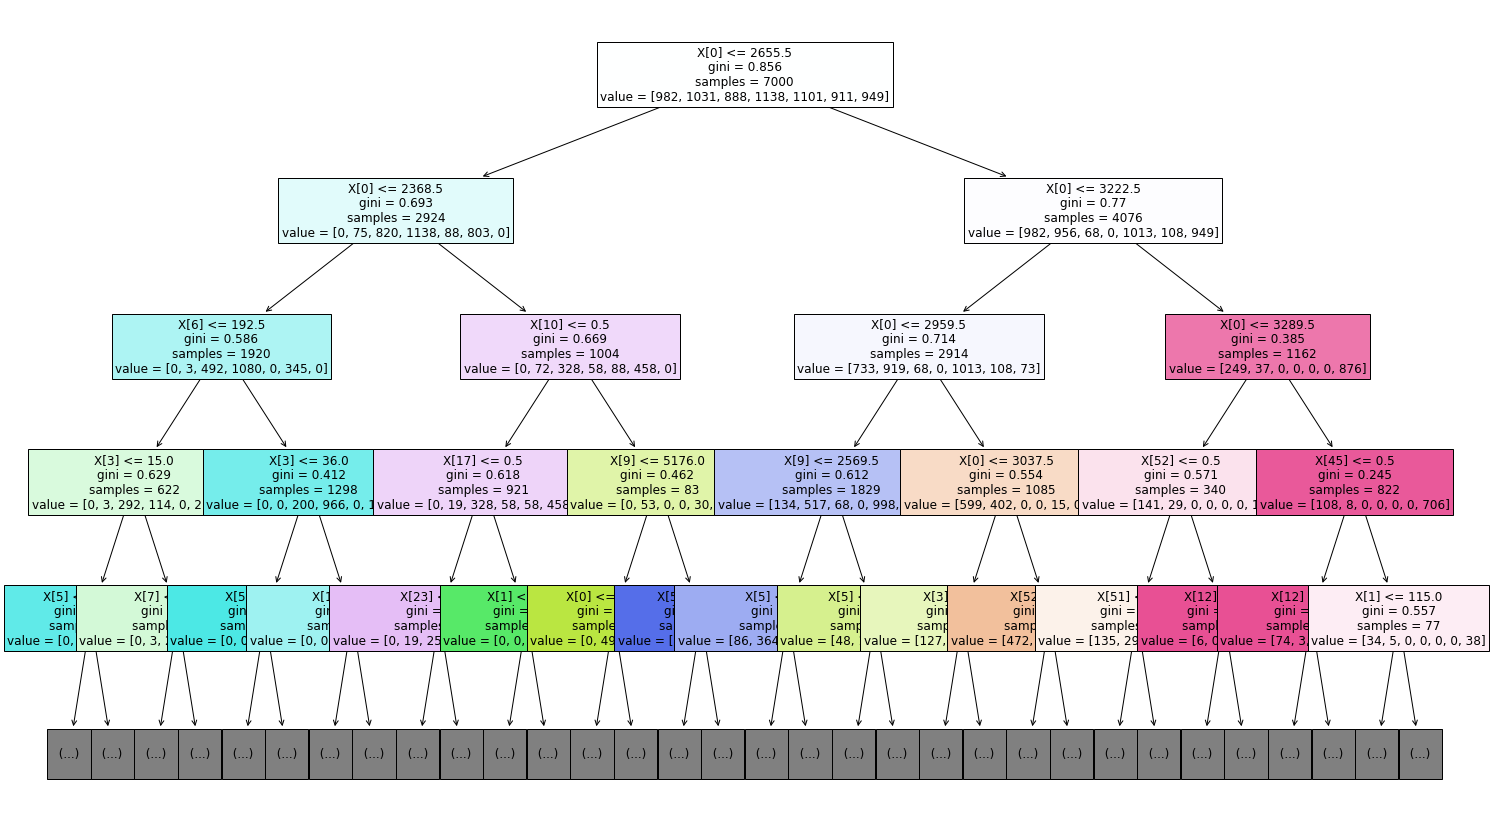

In [18]:
# L'arbre est tres grand, on ne peut visualiser que le debut
plt.figure(figsize=(25,15))
_ = tree.plot_tree(clf_cov_dt, filled=True, fontsize=12, max_depth=4)

In [19]:
print('Exactitude de la classification avec un arbre de decision : '+str(clf_cov_dt_test_results['exactitude']))
print('Score F1 de la classification avec un arbre de decision : '+str(clf_cov_dt_test_results['F1']))

Exactitude de la classification avec un arbre de decision : 0.77
Score F1 de la classification avec un arbre de decision : 0.77


On obtient une exactitude de classification de 77%, ce qui est assez moyen.

Reprenons le même problème avec un classifieur à base de forêts aléatoires.
On essaie d'apprendre une forêt aleatoire comportant 100 arbres, et on va explorer l'impact de la profondeur des arbres dans la forêt (allant de 2 à 29).

In [20]:
for d in range (2,30):
    clf_cov_rf,clf_cov_rf_test_results = clf(Xcov_train,ycov_train,Xcov_test,ycov_test,ensemble.RandomForestClassifier(n_estimators=100,max_depth=d))
    print('Profondeur RF : '+str(d)+'\tExactitude  '+str(clf_cov_rf_test_results['exactitude'])+'\tF1  '+str(clf_cov_rf_test_results['F1']))

Profondeur RF : 2	Exactitude  0.55	F1  0.55
Profondeur RF : 3	Exactitude  0.61	F1  0.61
Profondeur RF : 4	Exactitude  0.65	F1  0.65
Profondeur RF : 5	Exactitude  0.67	F1  0.67
Profondeur RF : 6	Exactitude  0.69	F1  0.69
Profondeur RF : 7	Exactitude  0.72	F1  0.72
Profondeur RF : 8	Exactitude  0.74	F1  0.74
Profondeur RF : 9	Exactitude  0.77	F1  0.77
Profondeur RF : 10	Exactitude  0.78	F1  0.78
Profondeur RF : 11	Exactitude  0.79	F1  0.79
Profondeur RF : 12	Exactitude  0.8	F1  0.8
Profondeur RF : 13	Exactitude  0.82	F1  0.82
Profondeur RF : 14	Exactitude  0.82	F1  0.82
Profondeur RF : 15	Exactitude  0.83	F1  0.83
Profondeur RF : 16	Exactitude  0.83	F1  0.83
Profondeur RF : 17	Exactitude  0.84	F1  0.84
Profondeur RF : 18	Exactitude  0.84	F1  0.84
Profondeur RF : 19	Exactitude  0.84	F1  0.84
Profondeur RF : 20	Exactitude  0.84	F1  0.84
Profondeur RF : 21	Exactitude  0.84	F1  0.84
Profondeur RF : 22	Exactitude  0.85	F1  0.85
Profondeur RF : 23	Exactitude  0.84	F1  0.84
Profondeur RF : 24	E

Avec des forêts composées d'arbres de profondeur 10 ou plus on arrive à un meilleur score de classification et qu'on peut pousser jusqu'à une exactitude de 85%, un gain important de 8% comparé à un arbre de décision, au prix d'un apprentissage plus long cependant.

On peut bien entendu accéder aux arbres de la forêt via l'attribut *estimators_* qui contient une liste de ces arbres. Illustrons le avec la forêt d'arbres de profondeur 3.

In [33]:
clf_cov_rf3,_ = clf(Xcov_train,ycov_train,Xcov_test,ycov_test,ensemble.RandomForestClassifier(n_estimators=100,max_depth=3))

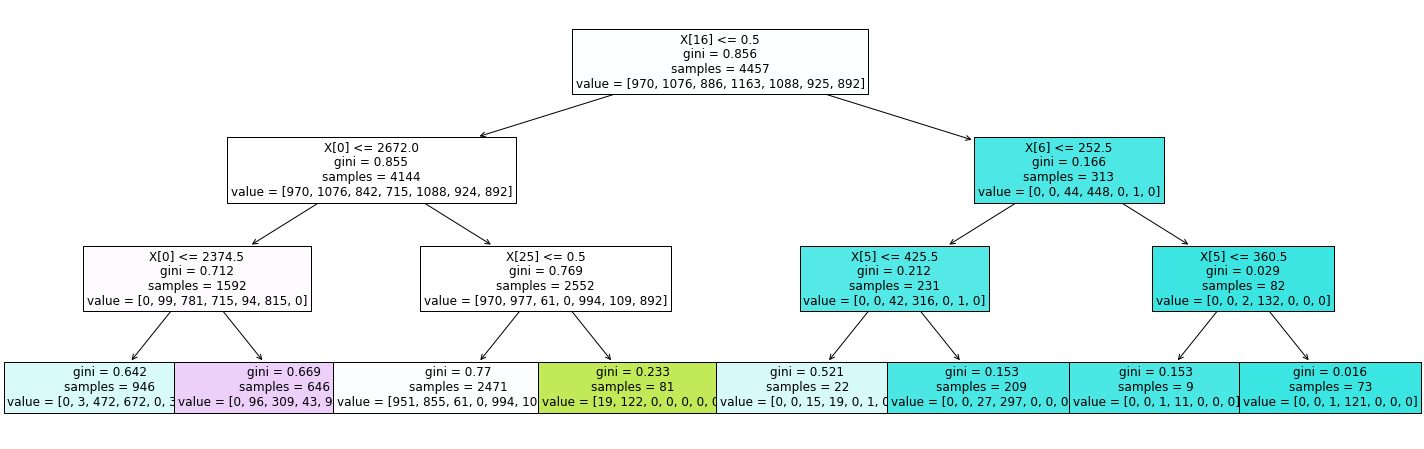

In [34]:
# Premier arbre
plt.figure(figsize=(25,8))
_ = tree.plot_tree(clf_cov_rf3.estimators_[0], filled=True, fontsize=12)

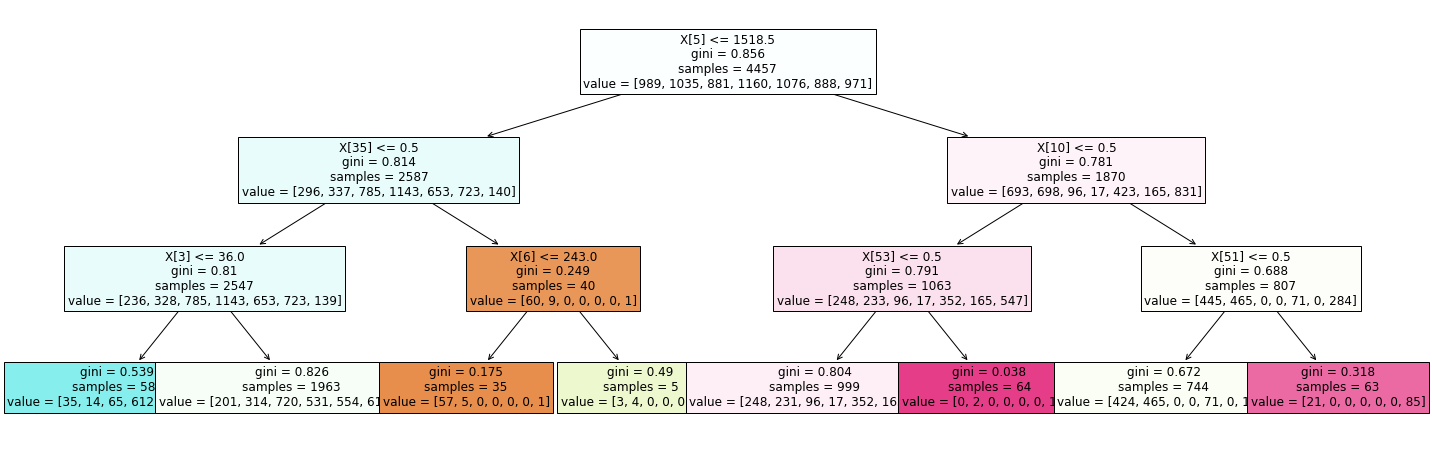

In [36]:
# Dernier arbre
plt.figure(figsize=(25,8))
_ = tree.plot_tree(clf_cov_rf3.estimators_[99], filled=True, fontsize=12)